In [186]:
import os
import cv2
import numpy as np

In [187]:
lst=os.listdir("DATA10")

In [188]:
lst

['test', 'train']

In [189]:
lst1=os.listdir("DATA10/"+lst[0])

In [190]:
for i in lst1:
    f="DATA10/"+lst[0]+"/"+i
    img=cv2.imread(f)
    
    kernel = np.ones((5,5),np.float32)/25
    res_mean = cv2.filter2D(img,-1,kernel)
    res_median= median = cv2.medianBlur(img,5)
    #wevlet denoising
    fn="Dataset/n_10_res/"+i+"mean.png"
    cv2.imwrite(fn,res_mean)
    fn="Dataset/n_10_res/"+i+"median.png"
    cv2.imwrite(fn,res_median)
    

In [191]:
lst1=os.listdir("DATA10/"+lst[1])

In [192]:
for i in lst1:
    f="DATA10/"+lst[1]+"/"+i
    img=cv2.imread(f)

    kernel = np.ones((5,5),np.float32)/25
    res_mean = cv2.filter2D(img,-1,kernel)
    res_median= median = cv2.medianBlur(img,5)
    #wevlet denoising
    fn="DATA10/n_25_res/"+i+"mean.png"
    cv2.imwrite(fn,res_mean)
    fn="DATA10/n_25_res/"+i+"median.png"
    cv2.imwrite(fn,res_median)

In [193]:
import pywt
import numpy as np
from scipy.misc import electrocardiogram
import scipy.signal as signal
import matplotlib.pyplot as plt
from PIL import Image
from resizeimage import resizeimage

In [194]:
wavelet_type='db3'
data = electrocardiogram()

In [195]:
DWTcoeffs = pywt.wavedec(data,wavelet_type,mode='symmetric', level=9, axis=-1)

DWTcoeffs[-1] = np.zeros_like(DWTcoeffs[-1])
DWTcoeffs[-2] = np.zeros_like(DWTcoeffs[-2])
DWTcoeffs[-3] = np.zeros_like(DWTcoeffs[-3])
DWTcoeffs[-4] = np.zeros_like(DWTcoeffs[-4])
DWTcoeffs[-5] = np.zeros_like(DWTcoeffs[-5])
DWTcoeffs[-6] = np.zeros_like(DWTcoeffs[-6])
DWTcoeffs[-7] = np.zeros_like(DWTcoeffs[-7])
DWTcoeffs[-8] = np.zeros_like(DWTcoeffs[-8])
DWTcoeffs[-9] = np.zeros_like(DWTcoeffs[-9])

filtered_data_dwt=pywt.waverec(DWTcoeffs,wavelet_type,mode='symmetric',axis=-1) 


In [196]:
Fc = 0.40 
w = Fc / (460 / 2) 
b, a = signal.butter(5, w, 'low')
filtered_data_butterworth = signal.filtfilt(b, a, data)

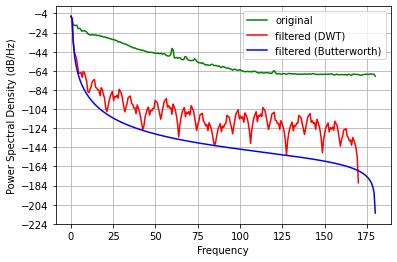

In [197]:
plt.figure(1)
plt.psd(data, NFFT=512, Fs=360, label='original', color='green')
plt.psd(filtered_data_dwt, NFFT=512, Fs=340, color='red', label='filtered (DWT)')
plt.psd(filtered_data_butterworth, NFFT=512, Fs=360, color='blue', label='filtered (Butterworth)')
plt.legend()

In [198]:
Fc = 0.40 
w = Fc / (460 / 2) 
b, a = signal.butter(5, w, 'high')
filtered_data_butterworth = signal.filtfilt(b, a, data)

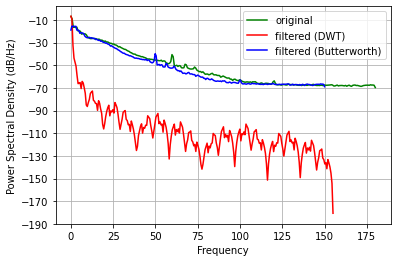

In [199]:
plt.figure(2)
plt.psd(data, NFFT=512, Fs=360, label='original', color='green')
plt.psd(filtered_data_dwt, NFFT=512, Fs=310, color='red', label='filtered (DWT)')
plt.psd(filtered_data_butterworth, NFFT=512, Fs=300, color='blue', label='filtered (Butterworth)')
plt.legend()

In [200]:
Fc = 0.40 
w = Fc / (460 / 2) 
b, a = signal.butter(5, w, 'high')
filtered_data_butterworth = signal.filtfilt(b, a, data)

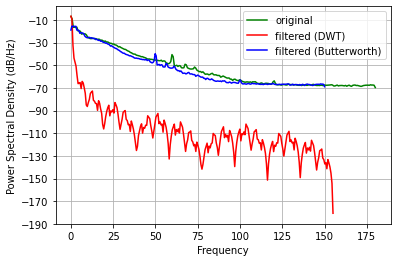

In [201]:
plt.figure(2)
plt.psd(data, NFFT=512, Fs=360, label='original', color='green')
plt.psd(filtered_data_dwt, NFFT=512, Fs=310, color='red', label='filtered (DWT)')
plt.psd(filtered_data_butterworth, NFFT=512, Fs=300, color='blue', label='filtered (Butterworth)')
plt.legend()

In [202]:
!pip install data

In [203]:
!pip install python-resize-image

  Using cached python_resize_image-1.1.20-py2.py3-none-any.whl (8.4 kB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\tests\\__init__.py'
Consider using the `--user` option or check the permissions.



In [204]:
import cv2
import os
import numpy as np
from PIL import Image
from resizeimage import resizeimage

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if filename == "train":
            continue
        if filename == "test":
            continue
        img = cv2.imread(os.path.join(folder,filename))
        img = np.array(img)
        s = img.shape
        s = np.array(s)
        if  s[0] == 258:
            img1 = Image.open(os.path.join(folder,filename))
            new1 = resizeimage.resize_contain(img1, [540, 420, 3])
            new1 = np.array(new1, dtype='uint8')
            images.append(new1)
        else:
            img1 = Image.open(os.path.join(folder,filename))
            images.append(img)
    return images

In [205]:
from pathlib import Path

In [206]:
input_dir  = Path('DATA10/')
train = input_dir / "train"
train_cleaned = input_dir / 'train'
test = input_dir / 'test'
train_images = sorted(os.listdir(train))
train_labels = sorted(os.listdir(train_cleaned))
test_images = sorted(os.listdir(test))

In [207]:
from keras.preprocessing.image import load_img, array_to_img, img_to_array

In [208]:
X = []
Y = []

for img in train_images:
    if img != "train":
        img = load_img(train / img, color_mode = "grayscale",target_size=(420,540))
        img = img_to_array(img).astype('float32')/255.
        X.append(img)

for img in train_labels:
    if img != "train_cleaned":
        img = load_img(train_cleaned / img, color_mode = "grayscale",target_size=(420,540))
        img = img_to_array(img).astype('float32')/255.
        Y.append(img)


X = np.array(X)
Y = np.array(Y)
X.shape,Y.shape

((200, 420, 540, 1), (200, 420, 540, 1))

In [209]:
from sklearn.model_selection import train_test_split

In [210]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.1)

In [211]:
from tensorflow.keras import datasets, layers, models,regularizers

In [212]:
model=models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu' , input_shape=(420, 540, 1)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (4,4), activation='relu', ))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2DTranspose(128, (3,3), activation='relu'))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.Conv2DTranspose(32, (3,3), activation='relu'))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.Conv2D(1, (5,5), activation='relu'))
model.compile(optimizer='Nadam', loss='mse')
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 418, 538, 32)      320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 209, 269, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 206, 266, 64)      32832     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 103, 133, 64)     0         
 2D)                                                             
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 105, 135, 128)    73856     
 ranspose)                                                       
                                                      

In [213]:
import tensorflow as tf

In [214]:
import random
random_id=random.random()
callbacks = [
  tf.keras.callbacks.EarlyStopping(patience=200, monitor='val_loss',restore_best_weights=True),
]

In [ ]:
model.fit(X_train, y_train, epochs=5,batch_size=8,validation_data=(X_valid,y_valid),callbacks=callbacks)

Epoch 1/5
 6/23 [======>.......................] - ETA: 3:11 - loss: 0.1141

In [131]:
test

WindowsPath('DATA10/test')

In [132]:
train

WindowsPath('DATA10/train')

In [133]:
train_cleaned

WindowsPath('DATA10/train')

In [134]:
import matplotlib.pyplot as plt

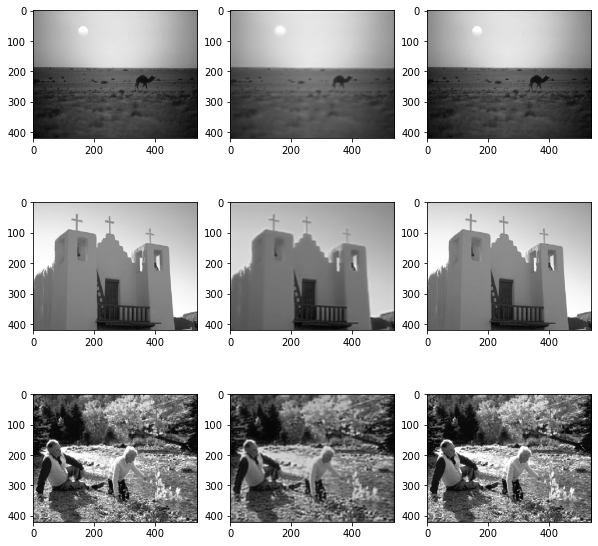

In [135]:
sample_test = load_img(test/ test_images[10], color_mode = "grayscale", target_size=(10,10))
sample_test = img_to_array(sample_test)
sample_test_img = sample_test.astype('float32')/255.
sample_test_img = np.expand_dims(sample_test, axis=0)

predicted_label = np.squeeze(model.predict(X_valid))


f, ax = plt.subplots(3,3, figsize=(10,10))
for i in range(3):
    ax[i][0].imshow(np.squeeze(X_valid[i].astype('float32')), cmap='gray')
    ax[i][1].imshow(np.squeeze(predicted_label[i].astype('float32')), cmap='gray')
    ax[i][2].imshow(np.squeeze(y_valid[i].astype('float32')), cmap='gray')
plt.show()

In [136]:
import numpy 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist

In [137]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

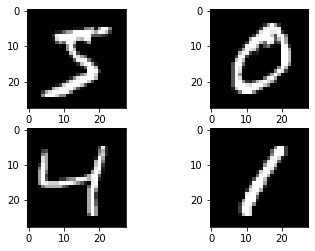

In [138]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [139]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_train = X_train / 255
X_test = X_test / 255

In [140]:
noise_factor = 0.2
x_train_noisy = X_train + noise_factor * numpy.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
x_test_noisy = X_test + noise_factor * numpy.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
x_train_noisy = numpy.clip(x_train_noisy, 0., 1.)
x_test_noisy = numpy.clip(x_test_noisy, 0., 1.)

In [141]:
model = Sequential()
model.add(Dense(500, input_dim=num_pixels, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(784, activation='sigmoid'))

In [142]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [143]:
model.fit(x_train_noisy, X_train, validation_data=(x_test_noisy, X_test), epochs=2, batch_size=200)

Epoch 1/2
300/300 [==============================] - 8s 24ms/step - loss: 0.0422 - val_loss: 0.0203
Epoch 2/2
300/300 [==============================] - 7s 24ms/step - loss: 0.0172 - val_loss: 0.0141


In [144]:
pred = model.predict(x_test_noisy)

Test Images


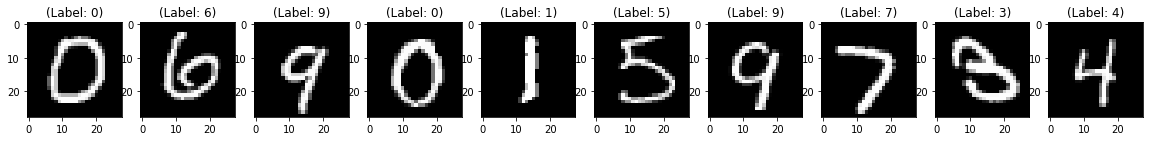

Test Images with Noise


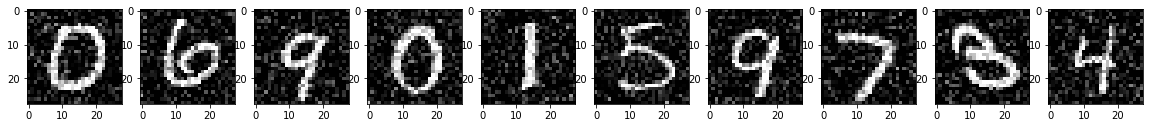

Reconstruct of Noisy Test Images


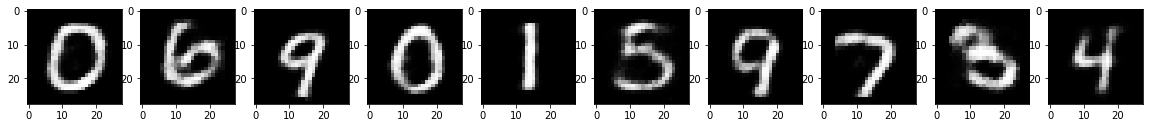

In [145]:
X_test = numpy.reshape(X_test, (10000,28,28)) *255
pred = numpy.reshape(pred, (10000,28,28)) *255
x_test_noisy = numpy.reshape(x_test_noisy, (-1,28,28)) *255
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test[i,:,:], cmap='gray')
    curr_lbl = y_test[i]
    plt.title("(Label: " + str(curr_lbl) + ")")
plt.show()    
plt.figure(figsize=(20, 4))
print("Test Images with Noise")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_noisy[i,:,:], cmap='gray')
plt.show()    
plt.figure(figsize=(20, 4))
print("Reconstruct of Noisy Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i,:,:], cmap='gray')  
plt.show()

In [1]:
import pickle
import numpy as np
import pandas as pd

In [2]:
def load_CIFAR_batch(filename, flatten=True, categorical=True):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = pickle.load(f, encoding='bytes')
        X = datadict[b'data']        
        X = X.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype("float")
        if (flatten):
          X = X.reshape(10000, 3072)
        X = X.astype('float32')
        X /= 255

        y = datadict[b'labels']
        y = np.array(y)
        if (categorical):
          y = pd.get_dummies(y).values

        return X, y

In [3]:
def load_CIFAR_meta(filename):
    with open(filename,'rb') as f:
        metadict = pickle.load(f, encoding='bytes')

    class_labels = [ val.decode() for val in metadict.get(b'label_names') ]
    return class_labels

In [4]:
def get_image(X, index, nchans=3, size=32):
    xi = X[index,:]
    img = xi.reshape(32, 32, 3)
    return img

In [158]:
X, y = load_CIFAR_batch('cifar10/data_batch_2')

In [162]:
class_labels = load_CIFAR_meta('cifar10/batches.meta')
print(class_labels)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [163]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size=0.2)

In [164]:
Xtrain = Xtrain.reshape(-1,1,3072)
Xtest = Xtest.reshape(-1,1,3072)

In [165]:
Xtrain.shape

(8000, 1, 3072)

In [166]:
ytrain.shape

(8000, 10)

In [167]:
from keras.layers import Embedding, LSTM, Dropout, Dense

In [174]:
model=Sequential()
model.add(LSTM(128,input_shape=(Xtrain.shape[1:]),activation='relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='linear'))
model.compile(loss='hinge',optimizer='adam',metrics=['ACCURACY'])

In [175]:
model.compile(loss = 'hinge', optimizer = "adam", metrics = ["ACCURACY"])

In [170]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 128)            1638912   
                                                                 
 dropout_3 (Dropout)         (None, 1, 128)            0         
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 32)                4128      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 10)               

In [183]:
hist = model.fit(Xtrain, ytrain, validation_data=(Xtest, ytest), epochs = 5)

Epoch 1/5
250/250 [==============================] - 5s 21ms/step - loss: 0.2246 - ACCURACY: 0.1474 - val_loss: 0.2092 - val_ACCURACY: 0.2010
Epoch 2/5
250/250 [==============================] - 5s 20ms/step - loss: 0.2202 - ACCURACY: 0.1571 - val_loss: 0.2096 - val_ACCURACY: 0.2045
Epoch 3/5
250/250 [==============================] - 5s 20ms/step - loss: 0.2174 - ACCURACY: 0.1653 - val_loss: 0.2096 - val_ACCURACY: 0.2505
Epoch 4/5
250/250 [==============================] - 5s 20ms/step - loss: 0.2144 - ACCURACY: 0.1766 - val_loss: 0.2075 - val_ACCURACY: 0.2600
Epoch 5/5
250/250 [==============================] - 5s 21ms/step - loss: 0.2125 - ACCURACY: 0.1846 - val_loss: 0.2061 - val_ACCURACY: 0.2595


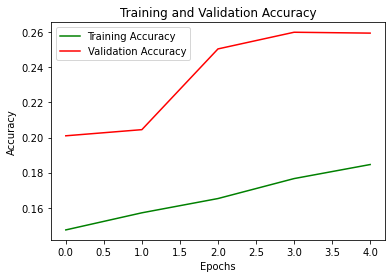

In [185]:
accuracy_train = hist.history['ACCURACY']
accuracy_val = hist.history['val_ACCURACY']
plt.plot(accuracy_train, 'g', label='Training Accuracy')
plt.plot(accuracy_val, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()